<table style="border: none; text-align: center" width="100%">
  <tr style="border: none">
    <td style="min-width:250px; border:none; text-align:left" bgcolor="white">
      <a href="https://www.audiolabs-erlangen.de/" target="_blank">
        <img src="./files/logo_alabs.svg" style="height:30px; display:inline-block" />
      </a>
    </td>
    <td style="min-width:250px; border:none; text-align:center" bgcolor="white">
      <a href="https://www.fau.de/" target="_blank">
        <img src="./files/logo_fau.svg" style="height:50px; display:inline-block" />
      </a>
    </td>
    <td style="min-width:250px; border:none; text-align:right" bgcolor="white">
      <a href="https://www.iis.fraunhofer.de/" target="_blank">
        <img src="./files/logo_iis.svg" style="height:30px; display:inline-block" />
      </a>
    </td>
</tr>
</table>

<div style="text-align: center">
<h1>Harmonic Percussive Source Separation</h1>
<b>Lab Course</b><br/>
<b>International Audio Laboratories Erlangen</b><br/>
<b>Prof. Dr. Meinard Müller</b><br/>
<b>Winter Term 2018/19</b>
</div>

<br/>

<div class="list-group">
  <a style="padding: 7px" class="list-group-item disabled"><b>Authors</b></a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/professor/mueller" class="list-group-item">Meinard Müller</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/driedger" class="list-group-item">Jonathan Driedger</a>
    <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/praetzlich" class="list-group-item">Thomas Prätzlich</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow" class="list-group-item">Frank Zalkow</a>
</div>

<div class="list-group">
  <a style="padding: 7px" class="list-group-item disabled"><b>Tutors of this Semester</b></a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/lopez" class="list-group-item">Patricio López-Serrano</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/rosenzweig" class="list-group-item">Sebastian Rosenzweig</a>
  <a style="padding: 7px" href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow" class="list-group-item">Frank Zalkow</a>
</div>

<div>
<em>Harmonic Percussive Source Separation</em>, &copy; September 2018
</div>

## <a name="abstract"></a> Abstract

Sounds can broadly be classified into two classes. Harmonic
sound on the one hand side is what we perceive as
pitched sound and what makes us hear melodies and chords.
Percussive sound on the other hand is noise-like and usually
stems from instrument onsets like the hit on a drum or from
consonants in speech.
The goal of harmonic-percussive
source separation (HPSS) is to decompose an input audio signal
into a signal consisting of all harmonic sounds
and a signal consisting of all percussive sounds.
In this lab course, we study an HPSS algorithm and implement it in Python.
Exploiting knowledge about the spectral structure of harmonic and percussive sounds,
this algorithm decomposes the spectrogram of the given input signal
into two spectrograms, one for the harmonic, and one for the percussive component.
Afterwards, two waveforms are reconstructed from the spectrograms
which finally form the desired signals.
Additionally, we describe the application of HPSS for enhancing chroma feature extraction and onset detection.
The techniques used in this lab cover median filtering, spectral masking and
the inversion of the short-time Fourier transform.

## <a name="hpss"></a> Harmonic-Percussive Source Separation

When listening to our environment, there exists a wide variety of different sounds.
However, on a very coarse level, many sounds can be
categorized to belong in either one of two classes:
harmonic or percussive sounds.
Harmonic sounds are the ones which we perceive to have a certain *pitch* such that we could for example sing along to them.
The sound of a violin is a good example of a harmonic sound.
*Percussive* sounds often stem from two colliding objects like for example the two shells of castanets.
An important characteristic of percussive sounds is that they do not have a pitch but a very clear
localization in time.
Many real-world sounds are mixtures of harmonic and percussive components.
For example, a note played on a piano has a percussive onset (resulting from the hammer hitting the strings)
preceding the harmonic tone (resulting from the vibrating string).

<div class="alert alert-block alert-warning">
<b>Homework Exercise 1</b><br>
Think about three real world examples of sounds which are clearly harmonic and three examples of
      sounds which are clearly percussive.
</div>

<div class="alert alert-block alert-warning">
What are characteristics of harmonic and percussive signals? Sketch a
      waveform of a percussive signal and the waveform of a harmonic signal. What are the main
      differences between those waveforms?
</div>

The goal of harmonic-percussive source separation (HPSS) is to decompose a given input signal into a
sum of two component signals,
one consisting of all harmonic sounds and the other consisting of all percussive sounds.
The core observation in many HPSS algorithms is that in a spectrogram representation of the
input signal, harmonic sounds tend to form horizontal structures (in time-direction), while
percussive sounds form vertical structures (in frequency-direction).
For an example, have a look at following Figure where you can see the power spectrograms of two signals.
The left Figure shows the power spectrogram of a sine-tone with a frequency of
$4000$ Hz and a duration of one second.
This tone is as harmonic as a sound can be.
The power spectrogram shows just one horizontal line.
Contrary, the power spectrogram on the rigtht side shows just one vertical line.
It is the spectrogram of a signal which is zero everywhere, except for the sample at $0.5$ seconds  where it is one.
Therefore, when listening to this signal, we just hear a brief ``click'' at $0.5$ seconds.
This signal is the prototype of a percussive sound.
The same kind of structures can be observed in lower Figure, which shows a
spectrogram of a violin recording and a spectrogram of a castanets recording.

<table>
  <tr>
    <th>
      <img src="./files/figure_spec_sinusoid.svg">
     </th>
     <th>
      <img src="./files/figure_spec_impulse.svg">
     </th>
   </tr>
   <tr>
    <th style="text-align: center;">
      Spectrogram of an ideal harmonic signal.
     </th>
     <th style="text-align: center;">
      Spectrogram of an ideal percussive signal.
     </th>
   </tr>
   <tr>
    <th>
      <img src="./files/figure_spec_violin.svg">
     </th>
     <th>
      <img src="./files/figure_spec_castanets.svg">
     </th>
   </tr>
   <tr>
    <th style="text-align: center;">
      Spectrogram of a recording of a violin.
     </th>
     <th style="text-align: center;">
      Spectrogram of a recording of a castanets.
     </th>
   </tr>
</table>

Real world signals are usually mixtures of harmonic and percussive sounds.
Furthermore, there is no absolute definition of when a sound stops "being harmonic" and starts "being percussive".
Think, for example, of white noise which cannot be assigned to either one of these classes.
However, with the above observations it is possible to decide if a time-frequency instance
of a spectral representation of the input signal, like the short-time Fourier transform (STFT), belongs rather to
the harmonic component or rather to the percussive component.
This can be done in the following way.
Assume we want to find out if a time-frequency bin in the STFT of the input signal belongs
to the harmonic component.
In this case, the bin should be part of some horizontal, and therefore harmonic structure.
We can check this by first applying some filter to the power spectrogram of the STFT, which enhances horizontal structures
and suppresses vertical structures and see if the filtered bin has some "high value".
However, even if its value is high, it might still belong to some even stronger vertical, and therefore
percussive structure.
We therefore apply another filter to the power spectrogram which enhances vertical structures and suppresses horizontal structures.
Now, in the case that the value of our bin in this vertically enhanced spectrogram is lower than in the horizontally enhanced
spectrogram, it is very likely that it belongs to some harmonic sound and we can assign it to the harmonic component.
Otherwise, if its value was higher in the vertically enhanced spectrogram, we directly know that it is rather
part of some percussive sound and assign it to the percussive component.
This way, we can decide for every time-frequency instance of the original STFT of the input signal whether it belongs
to the harmonic, or to the percussive component and construct two new STFTs.
In the STFT for the harmonic component, all bins which were assigned to the percussive component are set to zero,
and vice versa for the percussive component.
Finally, by "inverting" these STFTs, we get the audio signals for the harmonic and the percussive component.

<div class="alert alert-block alert-warning">
<b>Homework Exercise 2</b><br>
Suppose you apply an HPSS algorithm to white noise. Recall that white noise has a constant power spectral density (it is also said to be flat). What do you expect the harmonic and the percussive
      component to sound like?
</div>

<div class="alert alert-block alert-warning">
If you apply an HPSS algorithm to a recording of your favorite rock band. What do you expect
      the harmonic and the percussive component to sound like?
</div>

## <a name="algoritm"></a> An HPSS Algorithm

We will now describe an actual HPSS algorithm.
Formally, given a discrete input audio signal $x:{\mathbb Z}\to{\mathbb R}$, the algorithm should compute a harmonic component signal $x_\mathrm{h}$
and a percussive component signal $x_\mathrm{p}$, such that $x = x_\mathrm{h} + x_\mathrm{p}$.
Furthermore, the signals  $x_\mathrm{h}$ and $x_\mathrm{p}$ contain the harmonic and percussive sounds of $x$, respectively.
In the following we describe the consecutive steps of an HPSS algorithm.
We start with the computation of the *STFT* (Subsection [STFT](#STFT)) and proceed
with enhancing the power spectrogram using *median filtering* (Subsection [Median Filtering](#MedFilt)).
Afterwards, the filtered spectrograms are used to compute *binary masks* (Subsection [Binary Masking](#Mask)) which are
used to construct STFTs for the harmonic and the percussive component.
These STFTs are finally transformed back to the time domain (Subsection [ISTFT](#ISTFT)).

### <a name="STFT"></a> STFT

In the first step, we compute  the short-time Fourier transform (STFT) ${\mathcal X}$ of the signal $x$ as:

\begin{equation}
    {\mathcal X}(m,k):= \sum_{n=0}^{N-1} x(n + m H)w(n)\exp(-2\pi ikn/N)
\end{equation}

with ${m\in[0:M-1]:=\{0,\ldots,M -1\}}$ and $k\in[0:N-1]$, where $M$ is the number of frames,
$N$ is the frame size and length of the discrete Fourier transform,
${w:[0:N -1]\to{\mathbb R}}$ is a window function and $H$ is the hopsize.
From ${\mathcal X}$ we can then derive the power spectrogram ${\mathcal Y}$ of $x$:

\begin{equation}
    {\mathcal Y}(m,k) := |{\mathcal X}(m,k)|^2.
\end{equation}

<div class="alert alert-block alert-warning">
<b>Homework Exercise 3</b><br>
The parameters of the STFT have a crucial influence on the HPSS algorithm. Think about what happens to ${\mathcal Y}$ in the case
      you choose $N$ to be very large or very small. How could this influence the algorithm? (Hint: Think about how $N$ influences the time- and frequency-resolution of the STFT.)
</div>

<div class="alert alert-block alert-warning">
Explain in technical terms why harmonic sounds form horizontal and percussive sounds form vertical structures in spectrograms. (Hint: Have a look at the exponential basis functions of the STFT. What does one of these functions describe? How can an impulse be represented with them?)
</div>

<div class="alert alert-block alert-warning">
<b>Lab Experiment 1</b><br>
Load an audio file <samp>CastanetsViolin.wav</samp> using <samp>sf.read</samp>.
</div>

In [3]:
import soundfile as sf
from IPython.display import Audio

# your code here...

import soundfile as sf
from IPython.display import Audio

# your code here...

x, Fs = sf.read("CastanetsViolin.wav")

if x.ndim > 1:
    x = x[:, 0]

Audio(x, rate=Fs)

<div class="alert alert-block alert-warning">
Compute the STFT ${\mathcal X}$ of the input signal $x$ using <samp>librosa.stft</samp> with the parameters <samp>N=1024</samp>, <samp>H=512</samp>, and a hann-window.
</div>

In [4]:
import librosa
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

# your code here...
N=1024
H=512

w = signal.get_window('hann', N)

# Compute STFT using librosa
stft_result = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann',pad_mode='constant',center=True)

<div class="alert alert-block alert-warning">
Compute the power spectrogram ${\mathcal Y}$.
</div>

In [5]:
import numpy as np

# your code here...


# Convert to power spectrogram (magnitude squared)
magnitude = np.abs(stft_result) **2

# Compute time vector
num_frames = magnitude.shape[1]
t = np.arange(num_frames) * H / Fs

# Compute frequency vector
num_bins = magnitude.shape[0]
f = np.arange(num_bins) * Fs / N

# Output the time and frequency vectors for verification
print(f"Time vector computed. Length: {len(t)}")
print(f"First few time values (seconds): {t[:5]}")
print(f"Frequency vector computed. Length: {len(f)}")
print(f"First few frequency values (Hz): {f[:5]}")


Time vector computed. Length: 288
First few time values (seconds): [0.         0.02321995 0.04643991 0.06965986 0.09287982]
Frequency vector computed. Length: 513
First few frequency values (Hz): [ 0.         21.53320312 43.06640625 64.59960938 86.1328125 ]


<div class="alert alert-block alert-warning">
Visualize ${\mathcal Y}$. Can you spot harmonic and percussive structures?
      Apply logarithmic compression with $\gamma=10$ (see STFT Lab for details on this) when visualizing spectrograms.
</div>

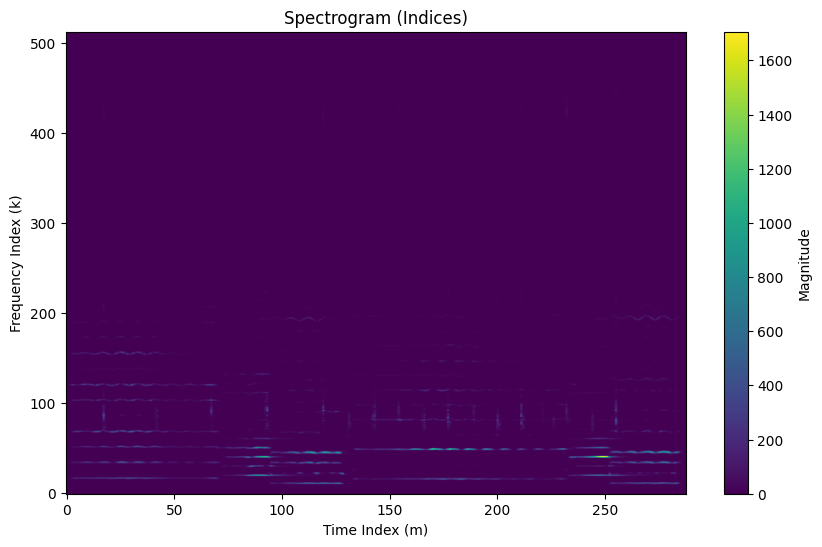

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

# your code here...

import matplotlib.pyplot as plt

# Visualize the spectrogram
plt.figure(figsize=(10, 6))  # Set an appropriate figure size

# Display the spectrogram using imshow
plt.imshow(
    magnitude,
    aspect='auto',      # Auto aspect ratio to fit the data
    origin='lower',     # Place the frequency axis origin at the bottom
    cmap='viridis'      # Use a colormap (e.g., 'viridis', 'plasma', 'magma')
)

# Add color bar to show the magnitude scale
plt.colorbar(label='Magnitude')

# Label axes
plt.xlabel('Time Index (m)')
plt.ylabel('Frequency Index (k)')

# Add a title
plt.title('Spectrogram (Indices)')

# Show the plot
plt.show()

<div class="alert alert-block alert-warning">
Do the same for the parameters $N=128$, $H=64$, a hann-window, and $N=8192$, $H=4096$, and a hann-window.
      How do the spectrograms change when you change the parameters? What happens to the harmonic and percussive structures?
</div>

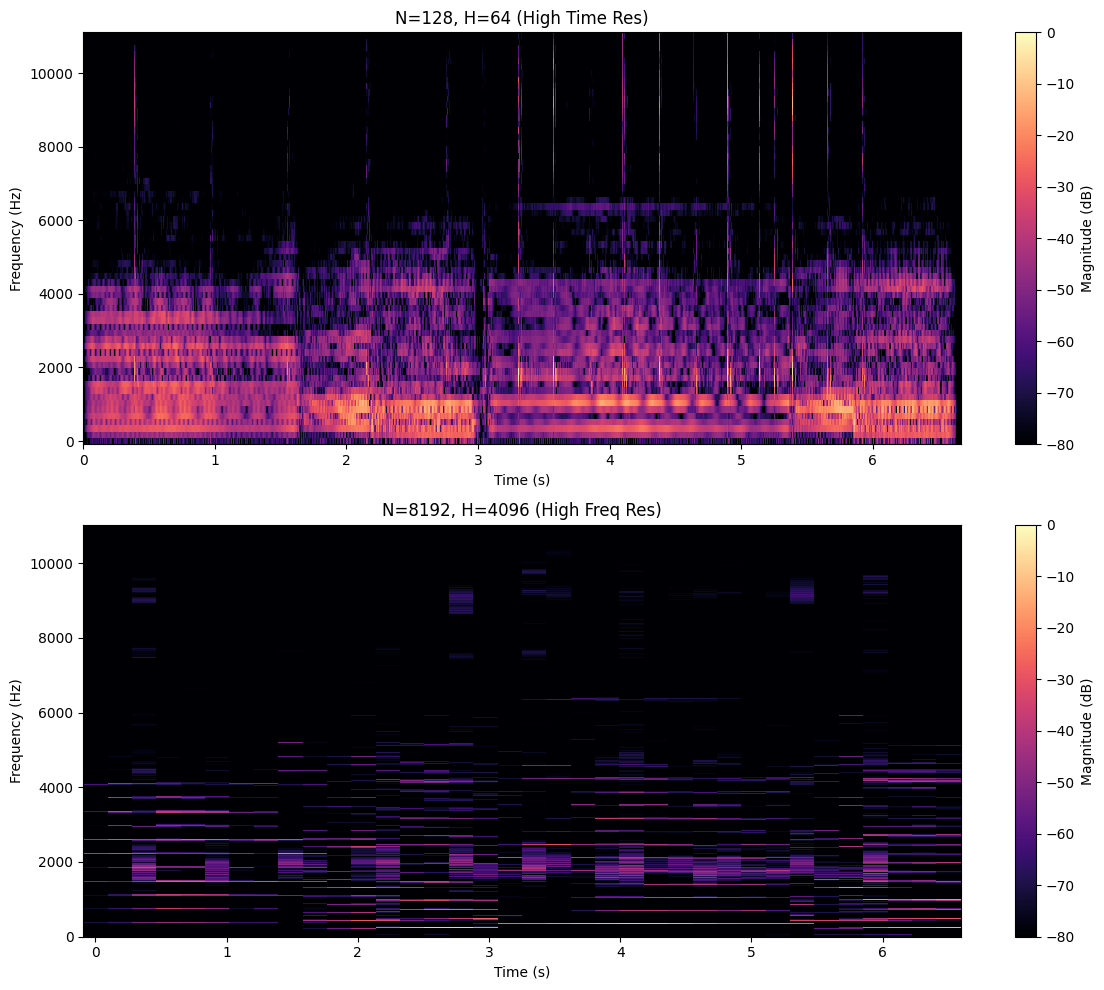

In [8]:
# your code here...

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Load the audio file
x, Fs = sf.read("CastanetsViolin.wav")

# If the audio file has multiple channels, use the first channel
if x.ndim > 1:
    x = x[:, 0]

# Parameters for the two configurations
configs = [
    {"N": 128, "H": 64, "title": "N=128, H=64 (High Time Res)"},
    {"N": 8192, "H": 4096, "title": "N=8192, H=4096 (High Freq Res)"}
]

# Compute and plot spectrograms for each configuration
plt.figure(figsize=(12, 10))
for i, config in enumerate(configs):
    N = config["N"]
    H = config["H"]

    # Compute STFT
    stft_result = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann')

    # Convert to power spectrogram (magnitude squared)
    magnitude = np.abs(stft_result) ** 2

    # Plot spectrogram
    plt.subplot(2, 1, i + 1)
    librosa.display.specshow(
        librosa.amplitude_to_db(magnitude, ref=np.max),
        sr=Fs,
        hop_length=H,
        x_axis="time",
        y_axis="hz",
        cmap="magma"
    )
    plt.colorbar(label="Magnitude (dB)")
    plt.title(config["title"])
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


### <a name="MedFilt"></a> Median Filtering

In the next step, we want to compute a *harmonically enhanced* spectrogram $\tilde{{\mathcal Y}}_\mathrm{h}$ and
a percussively enhanced spectrogram $\tilde{{\mathcal Y}}_\mathrm{p}$ by filtering ${\mathcal Y}$.
This can be done by using a *median filter*.
The median of a list of numbers can be found by arranging all numbers from lowest to highest value and picking
the middle one.
E.g. the median of the list $(7, 3, 4, 6, 5)$ is $5$.
Formally, let $A = (a_1, a_2, \dots, a_L)$ be a list of length $L \in {\mathbb N}$ consisting of real numbers $a_l \in {\mathbb R}, l \in [1:L]$.
First, the elements of $A$ are sorted in ascending order. This results in a list
$\tilde{A} = (\tilde{a}_1, \tilde{a}_2, \dots, \tilde{a}_L)$
with $\tilde{a}_l \leq \tilde{a}_m$ for $l < m$ and $l, m \in [1:L]$.
Then, the ${\mathrm{median}}$ of $A$ is defined as

\begin{equation}
{\mathrm{median}}(A) := \begin{cases} \tilde{a}_{(L+1)/2} & \mbox{for $L$ being odd}\\ (\tilde{a}_{L/2} + \tilde{a}_{L/2+1})/2 & \mbox{otherwise}\end{cases}
\end{equation}

Now, given a matrix $B\in{\mathbb R}^{M\times K}$, we define harmonic and percussive median filters

\begin{eqnarray}
    {\mathrm{medfilt}_\mathrm{h}}(B)(m,k) := {\mathrm{median}}(\{B(m-\ell_\mathrm{h},k),\ldots,B(m+\ell_\mathrm{h},k)\})\\
    {\mathrm{medfilt}_\mathrm{p}}(B)(m,k) := {\mathrm{median}}(\{B(m,k-\ell_\mathrm{p}),\ldots,B(m,k+\ell_\mathrm{p})\})
\end{eqnarray}

for $M,K,\ell_\mathrm{h},\ell_\mathrm{p}\in{\mathbb N}$, where $2\ell_\mathrm{h} + 1$ and $2\ell_\mathrm{p} + 1$ are the lengths of the median filters, respectively.
Note that we simply assume $B(m,k)=0$ for $m \notin [0:M-1]$ or $k \notin [0:K-1]$.
The enhanced spectrograms are then computed as

\begin{eqnarray}
    \tilde{{\mathcal Y}}_\mathrm{h} := {\mathrm{medfilt}_\mathrm{h}}({\mathcal Y})\\
    \tilde{{\mathcal Y}}_\mathrm{p} := {\mathrm{medfilt}_\mathrm{p}}({\mathcal Y})
\end{eqnarray}

<div class="alert alert-block alert-warning">
<b>Homework Excercise 4</b><br>
The arithmetic ${\mathrm{mean}}$ of a set $A\subset{\mathbb R}$ of size $N$ is defined as ${{\mathrm{mean}}(A):= \frac{1}{N}\sum_{n=0}^{N-1}a_n}$.
      Compute the ${\mathrm{median}}$ and the ${\mathrm{mean}}$ for the set ${A=\{2, 3, 190, 2, 3\}}$.
      Why do you think the HPSS algorithm employs median filtering and not mean filtering?
</div>

<div class="alert alert-block alert-warning">
Apply a horizontal and a vertical median filter of length $3$ to the matrix

\begin{equation*}
B =
\begin{bmatrix}
1 & 1 & 46 & 2 \\
3 & 1 & 50 & 1 \\
60 & 68 & 70 & 67 \\
2 & 1 & 65 & 1
\end{bmatrix}
\end{equation*}
</div>

In [9]:
from scipy import signal
from scipy.signal import medfilt
import numpy as np

# Compute median and mean for the given set A
A = [2, 3, 190, 2, 3]
median_A = np.median(A)
mean_A = np.mean(A)

print(f"Set A: {A}")
print(f"Median of A: {median_A}")
print(f"Mean of A: {mean_A}")

# Define the horizontal and vertical median filters
def horizontal_median_filter(matrix, filter_length):
    """Apply a horizontal median filter to the matrix."""
    return medfilt(matrix, kernel_size=(1, filter_length))

def vertical_median_filter(matrix, filter_length):
    """Apply a vertical median filter to the matrix."""
    return medfilt(matrix, kernel_size=(filter_length, 1))

# Define the input matrix B
B = np.array([[1, 1, 46, 2],
              [3, 1, 50, 1],
              [60, 68, 70, 67],
              [2, 1, 65, 1]], dtype='float64')

# Apply horizontal and vertical median filters
horizontal_filtered_B = horizontal_median_filter(B, 3)
vertical_filtered_B = vertical_median_filter(B, 3)

# Output results
print("Original B:")
print(B)
print("\nHorizontally filtered B:")
print(horizontal_filtered_B)
print("\nVertically filtered B:")
print(vertical_filtered_B)


Set A: [2, 3, 190, 2, 3]
Median of A: 3.0
Mean of A: 40.0
Original B:
[[ 1.  1. 46.  2.]
 [ 3.  1. 50.  1.]
 [60. 68. 70. 67.]
 [ 2.  1. 65.  1.]]

Horizontally filtered B:
[[ 1.  1.  2.  2.]
 [ 1.  3.  1.  1.]
 [60. 68. 68. 67.]
 [ 1.  2.  1.  1.]]

Vertically filtered B:
[[ 1.  1. 46.  1.]
 [ 3.  1. 50.  2.]
 [ 3.  1. 65.  1.]
 [ 2.  1. 65.  1.]]


<div class="alert alert-block alert-warning">
Explain in your own words why median filtering allows for enhancing/suppressing harmonic/percussive structures in a spectrogram.
</div>

<div class="alert alert-block alert-warning">
<b>Lab Experiment 2</b><br>
Apply harmonic and percussive median filters to the power spectrogram ${\mathcal Y}$ which you computed in the previous exercise (<samp>N=1024</samp>, <samp>H=512</samp>, and a hann-window using <samp>scipy.signal.medfilt</samp>.
</div>

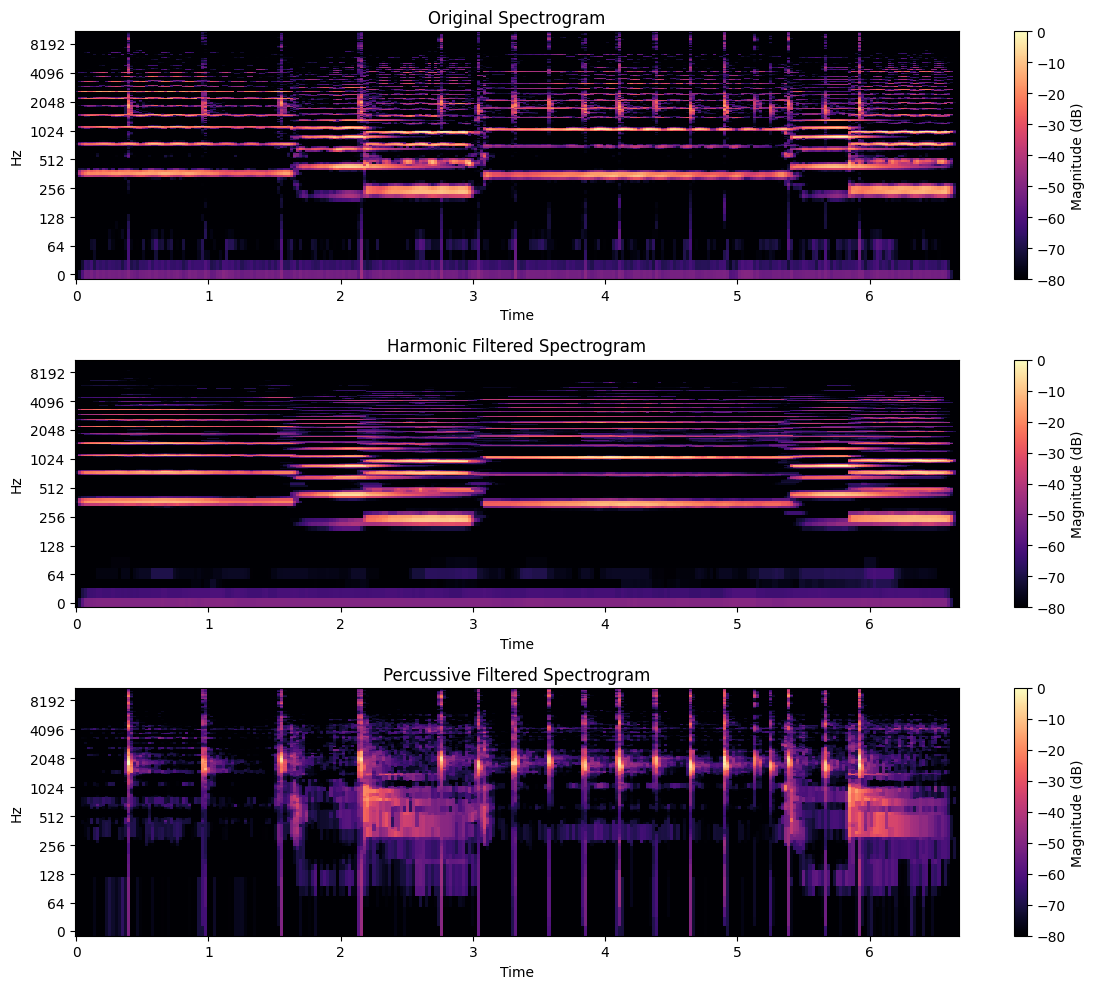

In [10]:
# your code here...


import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Load the audio file
file_path = "CastanetsViolin.wav"
x, Fs = sf.read(file_path)

# If the audio file has multiple channels, use the first channel
if x.ndim > 1:
    x = x[:, 0]

# Define STFT parameters
N = 1024  # Frame size
H = 512   # Hop size

# Compute the STFT
stft_result = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann',pad_mode='constant',center=True)

# Convert to power spectrogram (magnitude squared)
magnitude = np.abs(stft_result) ** 2

# Apply harmonic and percussive median filters (kernel size of 11)
harmonic_filtered = signal.medfilt(magnitude, kernel_size=(1, 11))  # Horizontal filter
percussive_filtered = signal.medfilt(magnitude, kernel_size=(11, 1))  # Vertical filter

# Visualize the original and filtered spectrograms
plt.figure(figsize=(12, 10))

# Original spectrogram
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), sr=Fs, hop_length=H, x_axis="time", y_axis="log", cmap="magma")
plt.colorbar(label="Magnitude (dB)")
plt.title("Original Spectrogram")

# Harmonic filtered spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(harmonic_filtered, ref=np.max), sr=Fs, hop_length=H, x_axis="time", y_axis="log", cmap="magma")
plt.colorbar(label="Magnitude (dB)")
plt.title("Harmonic Filtered Spectrogram")

# Percussive filtered spectrogram
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(percussive_filtered, ref=np.max), sr=Fs, hop_length=H, x_axis="time", y_axis="log", cmap="magma")
plt.colorbar(label="Magnitude (dB)")
plt.title("Percussive Filtered Spectrogram")

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning">
Play around with different filter lengths (3, 11, 51, 101). Visualize the filtered spectrograms. What are your observations?
</div>

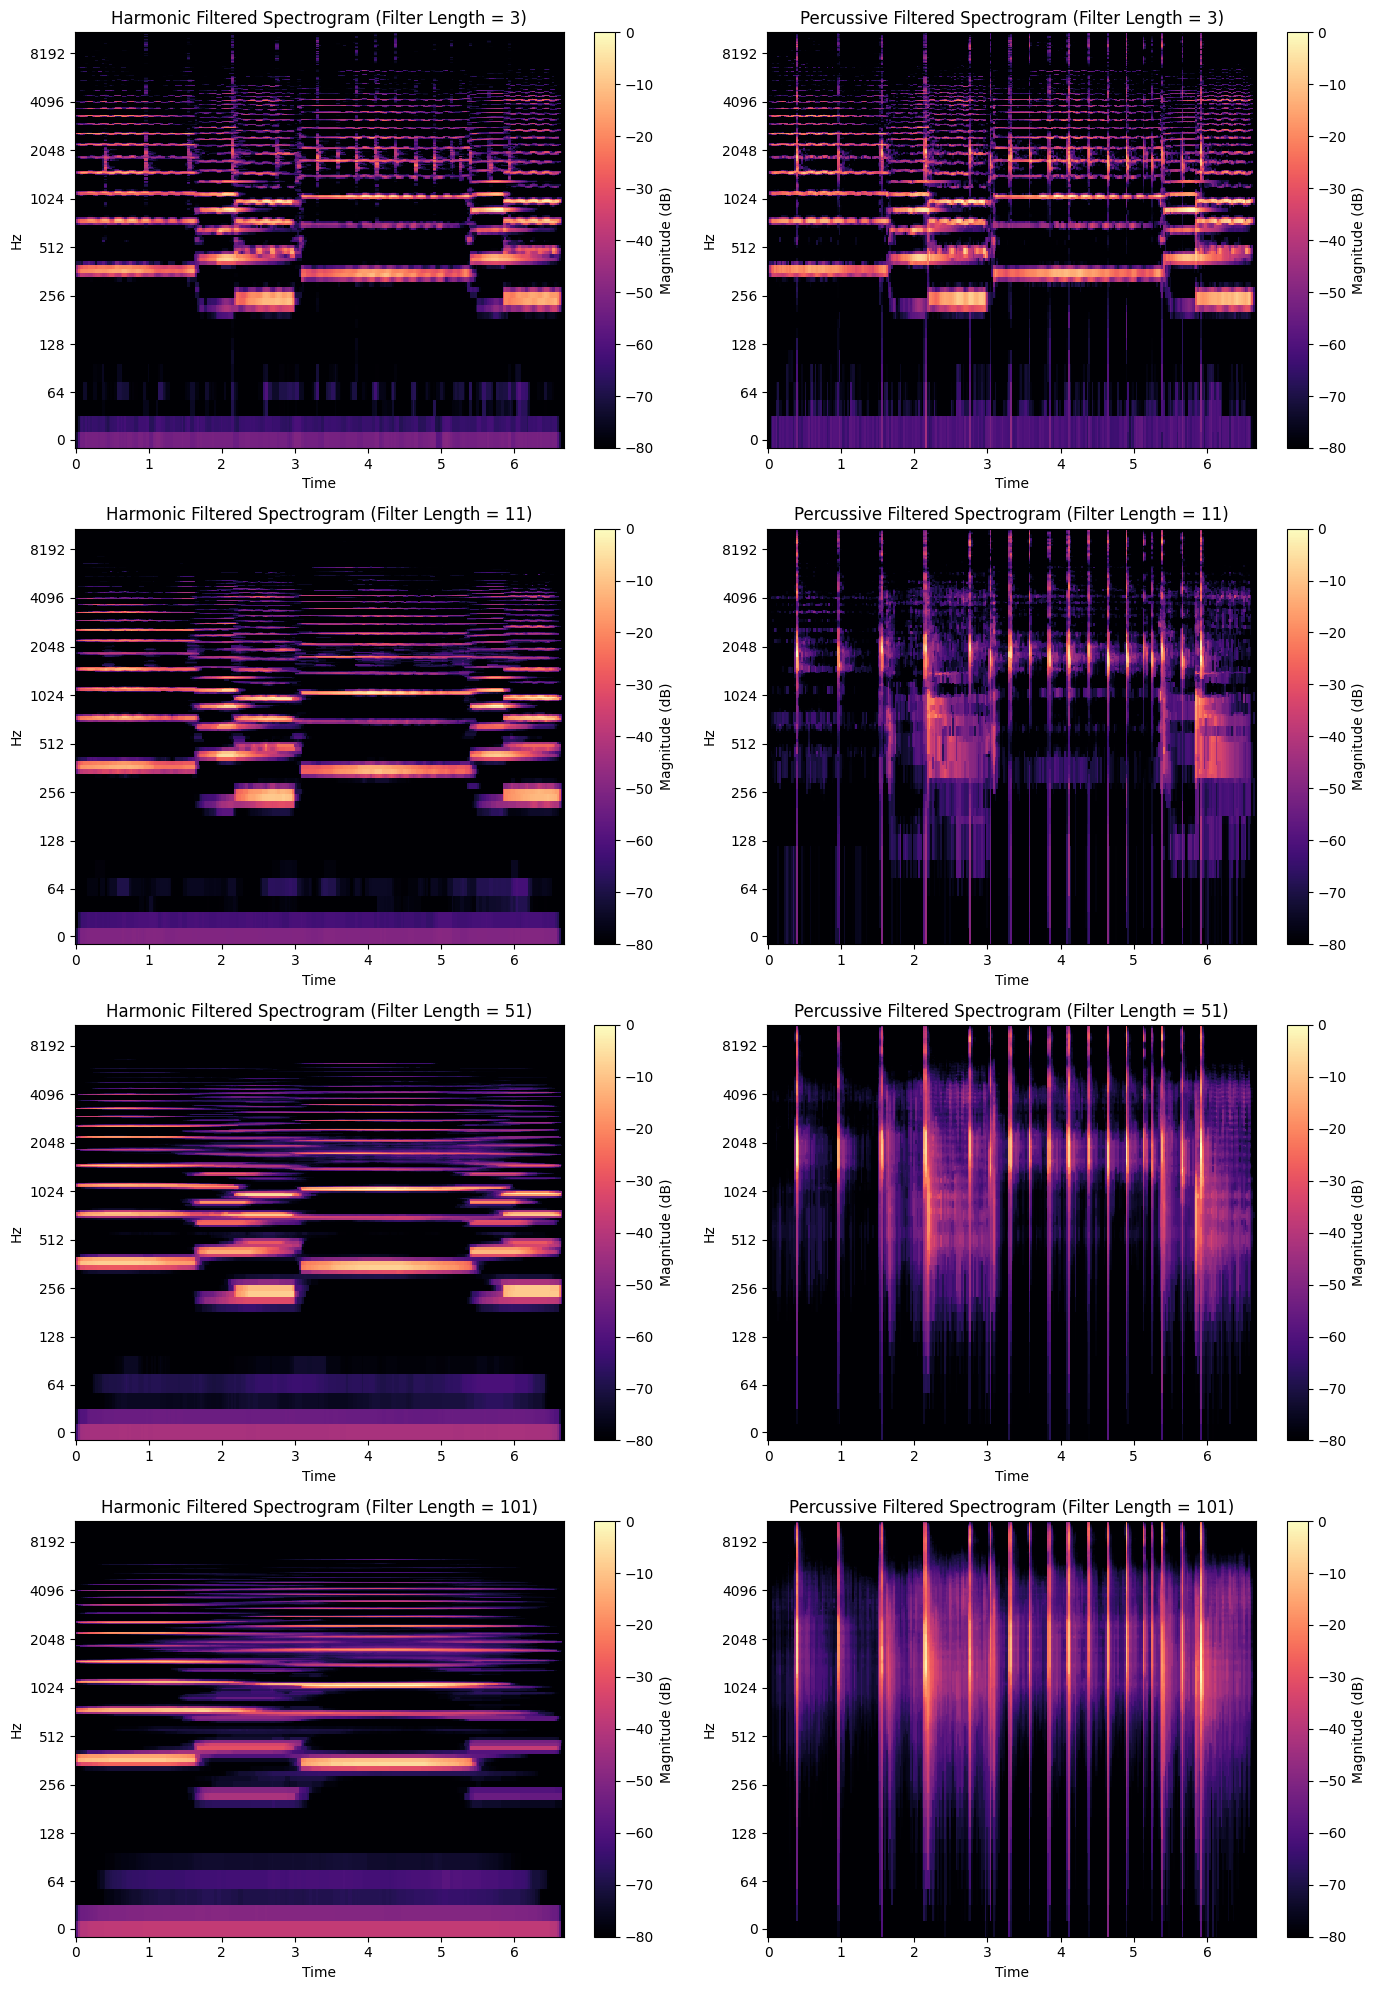

In [11]:
# your code here...

import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Load the audio file
file_path = "CastanetsViolin.wav"  # Replace with your file path
x, Fs = sf.read(file_path)

# If the audio file has multiple channels, use the first channel
if x.ndim > 1:
    x = x[:, 0]

# Define STFT parameters
N = 1024  # Frame size
H = 512   # Hop size

# Compute the STFT
stft_result = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann')

# Convert to power spectrogram (magnitude squared)
magnitude = np.abs(stft_result) ** 2

# Filter lengths to experiment with
filter_lengths = [3, 11, 51, 101]

# Plot the spectrograms for different filter lengths
plt.figure(figsize=(14, 20))

for i, fl in enumerate(filter_lengths):
    # Apply harmonic and percussive median filters
    harmonic_filtered = signal.medfilt(magnitude, kernel_size=(1, fl))  # Horizontal filter
    percussive_filtered = signal.medfilt(magnitude, kernel_size=(fl, 1))  # Vertical filter

    # Visualize the harmonic filtered spectrogram
    plt.subplot(len(filter_lengths), 2, i * 2 + 1)
    librosa.display.specshow(librosa.amplitude_to_db(harmonic_filtered, ref=np.max),
                             sr=Fs, hop_length=H, x_axis="time", y_axis="log", cmap="magma")
    plt.colorbar(label="Magnitude (dB)")
    plt.title(f"Harmonic Filtered Spectrogram (Filter Length = {fl})")

    # Visualize the percussive filtered spectrogram
    plt.subplot(len(filter_lengths), 2, i * 2 + 2)
    librosa.display.specshow(librosa.amplitude_to_db(percussive_filtered, ref=np.max),
                             sr=Fs, hop_length=H, x_axis="time", y_axis="log", cmap="magma")
    plt.colorbar(label="Magnitude (dB)")
    plt.title(f"Percussive Filtered Spectrogram (Filter Length = {fl})")

plt.tight_layout()
plt.show()

### <a name="Mask"></a>  Binary Masking

Having the enhanced spectrograms $\tilde{{\mathcal Y}}_\mathrm{h}$ and $\tilde{{\mathcal Y}}_\mathrm{p}$, we now need to assign all
time-frequency bins of ${\mathcal X}$ to either the harmonic or the percussive component.
This can be done by *binary masking*.
A binary mask is a matrix ${\mathcal M}\in\{0,1\}^{M\times K}$.
It can be applied to an STFT ${\mathcal X}$ by computing
${\mathcal X} \odot {\mathcal M}$, where the operator $\odot$ denotes point-wise multiplication.
A mask value of one preserves the value in the STFT and a mask value of zero suppresses it.
For our HPSS algorithm, the binary masks are defined by comparing the values in the enhanced
spectrograms $\tilde{{\mathcal Y}}_\mathrm{h}$ and $\tilde{{\mathcal Y}}_\mathrm{p}$.

\begin{eqnarray}
{\mathcal M}_\mathrm{h}(m,k) :=
\begin{cases}
   1 & \text{if } \tilde{{\mathcal Y}}_\mathrm{h}(m,k) \geq \tilde{{\mathcal Y}}_\mathrm{p}(m,k) \\
   0       & \text{else}
  \end{cases} \\
{\mathcal M}_\mathrm{p}(m,k) :=
\begin{cases}
   1 & \text{if } \tilde{{\mathcal Y}}_\mathrm{p}(m,k) > \tilde{{\mathcal Y}}_\mathrm{h}(m,k) \\
   0       & \text{else.}
  \end{cases}
\end{eqnarray}

Applying these masks to the original STFT ${\mathcal X}$ yields the STFTs for the harmonic and the percussive component of the signal
${{\mathcal X}_\mathrm{h} := ({\mathcal X} \odot {\mathcal M}_\mathrm{h})}$ and ${{\mathcal X}_\mathrm{p} := ({\mathcal X} \odot {\mathcal M}_\mathrm{p})}$.
Note that by the definition of ${\mathcal M}_\mathrm{h}$ and ${\mathcal M}_\mathrm{p}$, it holds that ${\mathcal M}_\mathrm{h}(m,k)+{\mathcal M}_\mathrm{p}(m,k) = 1$
for $m \in[0:M-1]$, $k\in[0:K-1]$.
Therefore, every time-frequency bin of ${\mathcal X}$ is assigned either to ${\mathcal X}_\mathrm{h}$ or ${\mathcal X}_\mathrm{p}$.

<div class="alert alert-block alert-warning">
<b>Homework Excercise 5</b><br>
Assume you have the two enhanced spectrograms

  \begin{equation*}
  \begin{array}{cc}
      \tilde{{\mathcal Y}}_\mathrm{h} =
      \begin{bmatrix}
      1 & 1 & 2 & 2 \\
      1 & 3 & 1 & 1 \\
      60 & 68 & 68 & 67 \\
      1 & 2 & 1 & 1
      \end{bmatrix}, &
      \tilde{{\mathcal Y}}_\mathrm{p} =
      \begin{bmatrix}
      1 & 1 & 46 & 1 \\
      3 & 1 & 50 & 2 \\
      2 & 1 & 65 & 1 \\
      2 & 1 & 65 & 1
      \end{bmatrix}
  \end{array}
  \end{equation*}

Compute the binary masks ${\mathcal M}_\mathrm{h}$ and ${\mathcal M}_\mathrm{p}$ and apply them to the matrix
      \begin{equation*}
      {\mathcal X} =
      \begin{bmatrix}
      1 & 1 & 46 & 2 \\
      3 & 1 & 50 & 1 \\
      60 & 68 & 70 & 67 \\
      2 & 1 & 65 & 1
      \end{bmatrix}
      \end{equation*}
</div>

In [12]:
import numpy as np


# your code here...

# Enhanced spectrograms and original spectrogram
#Y_h_toy = np.array([[1, 1, 2, 2], [1, 3, 1, 1], [60, 68, 68, 67], [1, 2, 1, 1]])  # Harmonic enhanced spectrogram
#Y_p_toy = np.array([[1, 1, 46, 1], [3, 1, 50, 2], [2, 1, 65, 1], [2, 1, 65, 1]])  # Percussive enhanced spectrogram
#X_toy = np.array([[1, 1, 46, 2], [3, 1, 50, 1], [60, 68, 70, 67], [2, 1, 65, 1]])  # Original spectrogram
X_toy=stft_result
Y_h_toy=harmonic_filtered
Y_p_toy=percussive_filtered
# Compute binary masks
M_h = (Y_h_toy >= Y_p_toy).astype(int)  # Harmonic binary mask
M_p = (Y_p_toy > Y_h_toy).astype(int)   # Percussive binary mask

# Apply the masks to the original spectrogram
X_h = X_toy * M_h  # Harmonic component
X_p = X_toy * M_p  # Percussive component

# Output results
print("Harmonic Binary Mask (M_h):")
print(M_h)

print("\nPercussive Binary Mask (M_p):")
print(M_p)

print("\nHarmonic Component (X_h):")
print(X_h)

print("\nPercussive Component (X_p):")
print(X_p)


Harmonic Binary Mask (M_h):
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]]

Percussive Binary Mask (M_p):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 0]]

Harmonic Component (X_h):
[[ 8.54523222e-02+0.j          6.27826831e-01+0.j
   1.26192889e+00+0.j         ...  7.13793567e-01+0.j
   1.04507230e-01+0.j          0.00000000e+00+0.j        ]
 [-2.75017032e-03+0.07035152j -2.75896056e-01+0.17518799j
  -6.09742601e-01+0.13970072j ... -3.29823958e-01-0.18303259j
  -1.21770245e-02-0.09261318j  0.00000000e+00+0.j        ]
 [-3.60672333e-02+0.00037539j -1.10664993e-01-0.01905732j
  -5.67090365e-02-0.11437443j ... -1.77601825e-02+0.00213012j
  -5.59003189e-02+0.03649938j  0.00000000e+00+0.j        ]
 ...
 [ 1.16721514e-03-0.00074159j  0.00000000e+00-0.j
   0.00000000e+00+0.j         ...  1.23766218e-03+0.00490061j
  -5.07669797e-04+0.00118017j  0.000

<div class="alert alert-block alert-warning">
<b>Lab Experiment 3</b><br>
Use the median filtered power spectrograms $\tilde{{\mathcal Y}}_\mathrm{h}$ and $\tilde{{\mathcal Y}}_\mathrm{p}$ from the previous exercise (filter length 11) to compute the binary masks ${\mathcal M}_\mathrm{h}$ and ${\mathcal M}_\mathrm{p}$.
</div>

In [13]:
# your code here...


# Compute binary masks
M_h = (Y_h_toy >= Y_p_toy).astype(int)  # Harmonic binary mask
M_p = (Y_p_toy > Y_h_toy).astype(int)   # Percussive binary mask

# Apply the masks to the original spectrogram
X_h = X_toy * M_h  # Harmonic component
X_p = X_toy * M_p  # Percussive component

# Output the results
print("Harmonic Binary Mask (M_h):")
print(M_h)

print("\nPercussive Binary Mask (M_p):")
print(M_p)

print("\nHarmonic Component (X_h):")
print(X_h)

print("\nPercussive Component (X_p):")
print(X_p)

Harmonic Binary Mask (M_h):
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]]

Percussive Binary Mask (M_p):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 0]]

Harmonic Component (X_h):
[[ 8.54523222e-02+0.j          6.27826831e-01+0.j
   1.26192889e+00+0.j         ...  7.13793567e-01+0.j
   1.04507230e-01+0.j          0.00000000e+00+0.j        ]
 [-2.75017032e-03+0.07035152j -2.75896056e-01+0.17518799j
  -6.09742601e-01+0.13970072j ... -3.29823958e-01-0.18303259j
  -1.21770245e-02-0.09261318j  0.00000000e+00+0.j        ]
 [-3.60672333e-02+0.00037539j -1.10664993e-01-0.01905732j
  -5.67090365e-02-0.11437443j ... -1.77601825e-02+0.00213012j
  -5.59003189e-02+0.03649938j  0.00000000e+00+0.j        ]
 ...
 [ 1.16721514e-03-0.00074159j  0.00000000e+00-0.j
   0.00000000e+00+0.j         ...  1.23766218e-03+0.00490061j
  -5.07669797e-04+0.00118017j  0.000

<div class="alert alert-block alert-warning">
Visualize the masks (this time without logarithmic compression).
</div>

<ipython-input-14-6eb350265f1c>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


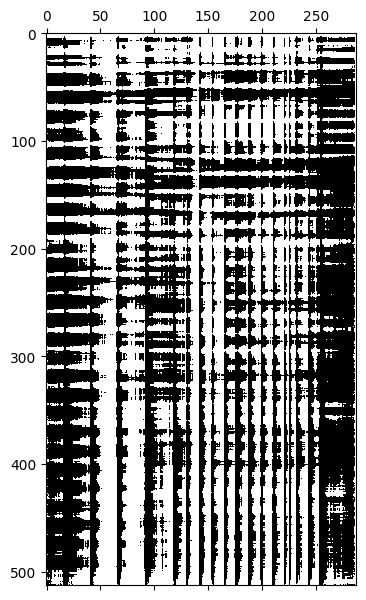

<ipython-input-14-6eb350265f1c>:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


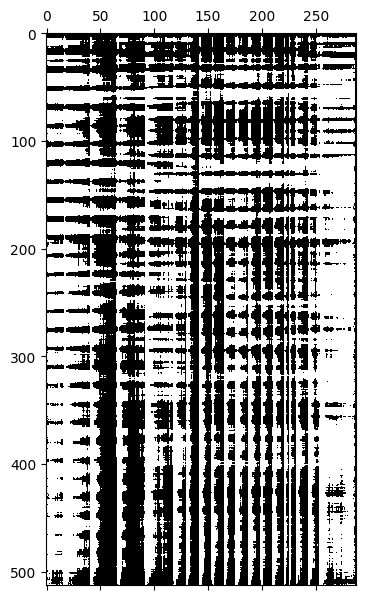

In [14]:
# your code here...

import matplotlib.pyplot as plt

# Visualize the harmonic and percussive binary masks

# Harmonic Mask
plt.matshow(M_h, aspect='auto',cmap='gray')
plt.tight_layout()
plt.show()

# Percussive Mask
plt.matshow(M_p, aspect='auto',cmap='gray')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
Apply the masks to the original STFT ${\mathcal X}$ to compute ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$.
</div>

In [15]:
# your code here...

# Apply the masks to the original STFT to compute harmonic and percussive STFTs
X_h_stft = X_toy * M_h  # Harmonic STFT
X_p_stft = X_toy * M_p  # Percussive STFT

# Output results for verification
print("Harmonic STFT (X_h_stft):")
print(X_h_stft)

print("\nPercussive STFT (X_p_stft):")
print(X_p_stft)

Harmonic STFT (X_h_stft):
[[ 8.54523222e-02+0.j          6.27826831e-01+0.j
   1.26192889e+00+0.j         ...  7.13793567e-01+0.j
   1.04507230e-01+0.j          0.00000000e+00+0.j        ]
 [-2.75017032e-03+0.07035152j -2.75896056e-01+0.17518799j
  -6.09742601e-01+0.13970072j ... -3.29823958e-01-0.18303259j
  -1.21770245e-02-0.09261318j  0.00000000e+00+0.j        ]
 [-3.60672333e-02+0.00037539j -1.10664993e-01-0.01905732j
  -5.67090365e-02-0.11437443j ... -1.77601825e-02+0.00213012j
  -5.59003189e-02+0.03649938j  0.00000000e+00+0.j        ]
 ...
 [ 1.16721514e-03-0.00074159j  0.00000000e+00-0.j
   0.00000000e+00+0.j         ...  1.23766218e-03+0.00490061j
  -5.07669797e-04+0.00118017j  0.00000000e+00+0.j        ]
 [ 6.40193761e-04+0.00139591j  0.00000000e+00+0.j
  -0.00000000e+00+0.j         ... -3.48062187e-03-0.00220763j
   9.78887529e-04-0.00049655j  0.00000000e+00+0.j        ]
 [-0.00000000e+00+0.j         -0.00000000e+00+0.j
   0.00000000e+00+0.j         ...  0.00000000e+00+0.j
  

<div class="alert alert-block alert-warning">
Visualize the power spectrograms ${\mathcal Y}_\mathrm{h}$ and ${\mathcal Y}_\mathrm{p}$ of ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$.
</div>

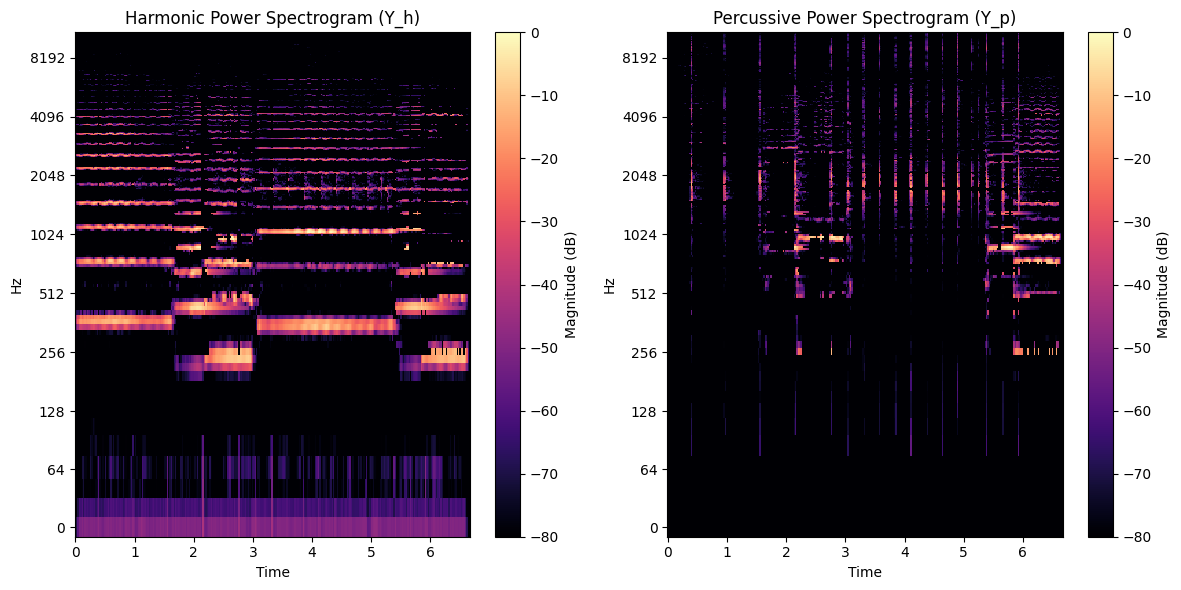

In [16]:
# your code here...

import librosa.display
import matplotlib.pyplot as plt

# Compute the power spectrograms for harmonic and percussive components
Y_h = np.abs(X_h_stft) ** 2  # Power spectrogram of harmonic component
Y_p = np.abs(X_p_stft) ** 2  # Power spectrogram of percussive component

# Plot the harmonic and percussive power spectrograms
plt.figure(figsize=(12, 6))

# Harmonic Power Spectrogram
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(Y_h, ref=np.max),
                         sr=Fs, hop_length=H, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(label='Magnitude (dB)')
plt.title("Harmonic Power Spectrogram (Y_h)")

# Percussive Power Spectrogram
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(Y_p, ref=np.max),
                         sr=Fs, hop_length=H, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(label='Magnitude (dB)')
plt.title("Percussive Power Spectrogram (Y_p)")

plt.tight_layout()
plt.show()

### <a name="ISTFT"></a>  Inversion of the Short-Time Fourier Transform

In the final step, we need to transform our constructed STFTs ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$ back to the time-domain.
To this end, we apply an "inverse" STFT to these matrices to compute the component signals $x_\mathrm{h}$ and $x_\mathrm{p}$.
Note that the topic "inversion of the STFT" is not as trivial as it might seem at the first glance.
In the case that ${\mathcal X}$ is the original STFT of an audio signal $x$, and further preconditions are satisfied (for example that $N \geq H$ for $N$ being the size of the discrete Fourier transform and $H$ being the hopsize of the STFT),
it is possible to invert the STFT and to reconstruct $x$ from ${\mathcal X}$ perfectly.
However, as soon as the original STFT ${\mathcal X}$ has been modified to some $\tilde{{\mathcal X}}$, for example by masking, there might be no audio signal which has exactly $\tilde{{\mathcal X}}$ as its STFT.
In such a case, one usually aims to find an audio signal whose STFT is "approximately" $\tilde{{\mathcal X}}$.
For this Lab Course, you can simply assume that you can invert the STFT using <samp>librosa.istft</samp>.

<img src="./files/HPSep3.png">

<div class="alert alert-block alert-warning">
<b>Homework Excercise 6</b><br>
Assume ${\mathcal X}$ is the original STFT of some audio signal $x$. Why do we need the precondition $N \geq H$ for $N$ being the size of the discrete Fourier transform and $H$ being the hopsize of the STFT to reconstruct $x$ from ${\mathcal X}$ perfectly?
</div>

<div class="alert alert-block alert-warning">
<b>Lab Experiment 4</b><br>
Apply the inverse STFT function <samp>librosa.istft</samp> to $X_\mathrm{h}$ and $X_\mathrm{p}$ from the previous experiment and listen to the results.
</div>

In [17]:
import librosa
from IPython.display import Audio, display

# your code here...

# Apply the inverse STFT to the harmonic and percussive STFTs
x_h = librosa.istft(X_h_stft, hop_length=H, win_length=N, window='hann')  # Harmonic signal
x_p = librosa.istft(X_p_stft, hop_length=H, win_length=N, window='hann')  # Percussive signal

# Listen to the results
print("Harmonic Component Audio:")
display(Audio(x_h, rate=Fs))

print("Percussive Component Audio:")
display(Audio(x_p, rate=Fs))


Harmonic Component Audio:


Percussive Component Audio:


<div class="alert alert-block alert-warning">
Save the computed harmonic and percussive component by using <samp>sf.write</samp>.
</div>

In [18]:
import soundfile as sf
from IPython.display import FileLink, display

# Save the harmonic and percussive components to audio files
sf.write('x_h.wav', x_h, Fs)  # Save harmonic component
sf.write('x_p.wav', x_p, Fs)  # Save percussive component

# Provide download links for the saved audio files
print("Download Harmonic Component:")
display(FileLink('x_h.wav'))

print("Download Percussive Component:")
display(FileLink('x_p.wav'))


Download Harmonic Component:


/content/x_h.wav

Download Percussive Component:


/content/x_p.wav

### <a name="intepret"></a>  Physical Interpretation of Parameters

Note that one can specify the filter lengths of the harmonic and percussive median filters  in seconds and Hertz, respectively.
This  makes their physical interpretation easier.
Given the sampling rate $F_\mathrm{s}$ of the input signal $x$ as well as the frame length $N$ and the hopsize $H$,
we can convert filter lengths given in seconds and Hertz to filter lengths given in indices

\begin{eqnarray}
L_\mathrm{h}(t):=\left\lceil \frac{F_\mathrm{s}}{H} t \right\rceil\label{eqn:L_h}\\
L_\mathrm{p}(d):=\left\lceil \frac{N}{F_\mathrm{s}} d \right\rceil\label{eqn:L_p}
\end{eqnarray}

<div class="alert alert-block alert-warning">
<b>Homework Excercise 7</b><br>
Assume $F_\mathrm{s}=22050$ Hz, $N=1024$, and $H=256$. Compute $L_\mathrm{h}(0.5\text{ sec})$ and $L_\mathrm{p}(600 \text{ Hz})$.
</div>

In [19]:
# your code here...

import math

# Given parameters
Fs = 22050  # Sampling rate in Hz
N = 1024    # Frame length
H = 256     # Hop size

# Filter lengths in seconds and Hertz
t_h = 0.5  # Harmonic filter length in seconds
d_p = 600  # Percussive filter length in Hertz

# Compute L_h(t) and L_p(d)
L_h = math.ceil(Fs / H * t_h)  # Filter length for harmonic in indices
L_p = math.ceil(N / Fs * d_p)  # Filter length for percussive in indices

# Output the results
print(f"L_h(0.5 sec) = {L_h} indices")
print(f"L_p(600 Hz) = {L_p} indices")


L_h(0.5 sec) = 44 indices
L_p(600 Hz) = 28 indices


<div class="alert alert-block alert-warning">
<b>Lab Experiment 5</b><br>
Complete the implementation of the HPSS algorithm in the function <samp>HPSS</samp>:

<ol>
<li> Compute the STFT ${\mathcal X}$ of the input signal $x$ using <samp>librosa.stft </samp>.</li>
<li> Compute the power spectrogram ${\mathcal Y}$ from the ${\mathcal X}$.</li>
<li> Convert the median filter lengths from seconds and Hertz to indices. if a filter length is even, subtract 1.</li>
<li> Apply median filters to ${\mathcal Y}$ using <samp>scipy.signal.medfilt</samp> to compute ${\mathcal Y}_\mathrm{h}$ and ${\mathcal Y}_\mathrm{p}$.</li>
<li> Derive the masks ${\mathcal M}_\mathrm{h}$ and ${\mathcal M}_\mathrm{p}$ from ${\mathcal Y}_\mathrm{h}$ and ${\mathcal Y}_\mathrm{p}$.</li>
<li> Compute ${\mathcal X}_\mathrm{h}$ and ${\mathcal X}_\mathrm{p}$.</li>
<li> Apply the inverse STFT (<samp>librosa.istft </samp>) to get $x_\mathrm{h}$ and $x_\mathrm{p}$.</li>
</ol>
</div>

In [20]:
    # x:      Input signal
    # N:      Frame length
    # H:      Hopsize
    # w:      Window function of length N
    # Fs:     Sampling rate of x
    # lh_sec: Horizontal median filter length given in seconds
    # lp_Hz:  Percussive median filter length given in Hertz

    # stft

    # power spectrogram

    # median filtering

    # masking

    # istft

import numpy as np
import librosa
import scipy.signal as signal

def HPSS(x, N, H, w, Fs, lh_sec, lp_Hz):

    #Harmonic Percussive Source Separation (HPSS) implementation.

    #Parameters:
    #- x: Input signal
    #- N: Frame length
    #- H: Hop size
    #- w: Window function of length N
    #- Fs: Sampling rate of x
    #- lh_sec: Horizontal median filter length in seconds
    #- lp_Hz: Percussive median filter length in Hertz

    #Returns:
    #- x_h: Harmonic component of the signal
    #- x_p: Percussive component of the signal

    # Step 1: Compute the STFT
  stft_result = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window=w)

    # Step 2: Compute the power spectrogram
  magnitude = np.abs(stft_result) ** 2

    # Step 3: Convert median filter lengths from seconds and Hertz to indices
  L_h = int(np.ceil(Fs / H * lh_sec))  # Horizontal filter length in indices
  L_p = int(np.ceil(N / Fs * lp_Hz))  # Percussive filter length in indices

    # Ensure filter lengths are odd (if even, subtract 1)
  if L_h % 2 == 0:
        L_h -= 1
  if L_p % 2 == 0:
        L_p -= 1

    # Step 4: Apply median filtering to compute enhanced spectrograms
  Y_h = signal.medfilt(magnitude, kernel_size=(1, L_h))  # Horizontal median filter
  Y_p = signal.medfilt(magnitude, kernel_size=(L_p, 1))  # Vertical median filter

    # Step 5: Compute masks
  M_h = (Y_h >= Y_p).astype(int)  # Harmonic binary mask
  M_p = (Y_p > Y_h).astype(int)   # Percussive binary mask

    # Step 6: Compute masked STFTs
  X_h_stft = stft_result * M_h  # Harmonic STFT
  X_p_stft = stft_result * M_p  # Percussive STFT

    # Step 7: Apply inverse STFT to get time-domain signals
  x_h = librosa.istft(X_h_stft, hop_length=H, win_length=N, window=w)
  x_p = librosa.istft(X_p_stft, hop_length=H, win_length=N, window=w)

  return x_h, x_p


<div class="alert alert-block alert-warning">
Test your implementation:

<ol>
<li> Load the audio files <samp>Stepdad.wav</samp>, <samp>Applause.wav</samp>, and <samp>DrumSolo.wav</samp> from the <samp>Data</samp> folder.</li>
<li> Apply HPSS using the parameters <samp>N=1024</samp>, <samp>H=512</samp>, a hann-window, <samp>lh_sec=0.2</samp>, and <samp>lp_Hz=500</samp> to all loaded signals.</li>
<li>Listen to the results.</li>
</ol>
</div>

In [21]:
from scipy.signal import get_window
for file in ('Stepdad.wav', 'Applause.wav', 'DrumSolo.wav'):
    print('# ' + file)
    x, Fs = sf.read(file)
    # your code here...
    N = 1024
    H = 512
    lh_sec = 0.2
    lp_Hz = 500
    w = get_window("hann", N)
    if x.ndim > 1:  # If stereo, take the first channel
        x = x[:, 0]

    # Apply HPSS
    x_h, x_p = HPSS(x, N, H, w, Fs, lh_sec, lp_Hz)

    print('Orignal')
    display(Audio(x, rate=Fs))
    print('Harmonic Component')
    display(Audio(x_h, rate=Fs))
    print('Percussive Component')
    display(Audio(x_p, rate=Fs))
    print('')




Output hidden; open in https://colab.research.google.com to view.

## <a name="application"></a> Applications of HPSS

In many audio processing tasks, the essential information lies in either the harmonic or the percussive component of an audio signal.
In such cases, HPSS is very well suited as a pre-processing step to enhance the outcome of an algorithm.
In the following, we introduce two procedures that can be improved by applying HPSS.
The harmonic component from the HPSS algorithm can be used to enhance chroma features (Subsection [Chroma](#chroma)) and the  percussive component helps to improve the results of an onset detection procedure (Subsection [Onset](#onset)).

## <a name="chroma"></a> Enhancing Chroma Features using HPSS

Two pitches sound similar when they are an octave apart from each other (12 tones in the equal tempered scale).
We say that these pitches share the same chroma which we refer to by the pitch spelling names $\{\mathrm{C},\mathrm{C}^{\sharp},\mathrm{D},\mathrm{D}^{\sharp},\mathrm{E},\mathrm{F},\mathrm{F}^{\sharp},\mathrm{G},\mathrm{G}^{\sharp},\mathrm{A},\mathrm{A}^{\sharp},\mathrm{B}\}$.
Chroma features exploit the above observation, by adding up all frequency bands in a power spectrogram that belong to the same chroma.
Technically this can be realized by the following procedure.
First we assign a pitch index (MIDI pitch number) to each frequency index $k \in [1:N/2-1]$ of the spectrogram by using the formula:

\begin{equation}
    p(k) =  \text{round}\left(12\log_2\left( \frac{ k\cdot F_\mathrm{s}}{440 \cdot N}\right)\right)+69.
\end{equation}

where $N$ is the number of frequency bins in the spectrogram and $F_\mathrm{s}$ is the sampling rate of the audio signal.
Note that $p$ maps frequency indices corresponding to frequencies around the chamber tone A4 (440 Hz) to its MIDI pitch number 69.
Then we add up all frequency bands in the power spectrogram belonging to the same chroma $c \in [0:11]$:

\begin{equation}
      {\mathcal C}(m,c) := \sum_ {\{k |\,p(k)\,\mathrm{mod}\,12 = c\,\}}{{\mathcal Y}(m,k)}
\end{equation}

where $m\in [0:M-1]$ and $M$ is the number of frames.

Chroma features are correlated with the pitches and the harmonic structure of music.
Pitches usually form horizontal structures in the spectrogram, whereas transient or percussive sounds form vertical structures. Percussive sounds have a negative impact on the chroma extraction, as they "activate all frequencies" in the spectrogram.
Hence, one way to improve the chroma extraction is to first apply HPSS and to perform the chroma extraction on the power spectrogram of the harmonic component signal ${\mathcal Y}_\mathrm{h}(m,k) = |{\mathcal X_\mathrm{h}(m,k)}|^2$.

<div class="alert alert-block alert-warning">
<b>Lab Experiment 6</b><br>
Apply the HPSS algorithm as a pre-processing step in a chroma extraction procedure:

<ol>
<li> Load the file <samp>CastanetsViolin.wav</samp>.</li>
<li> Compute chroma features on $x$ with the parameters <samp>N=4410</samp> and <samp>H=2205</samp>.</li>
<li> Visualize the chroma features.</li>
<li> Apply your HPSS algorithm to separate the castanets from the violin.</li>
<li> Use the harmonically enhanced signal $x_\mathrm{h}$ to compute chroma features and visualize them.</li>
<li> Now compare the visualization of the chroma extracted from the original signal $x$ and the chroma extracted from the harmonic component signal $x_\mathrm{h}$. What do you observe?</li>
</ol>


</div>

Original Signal Chroma Features:


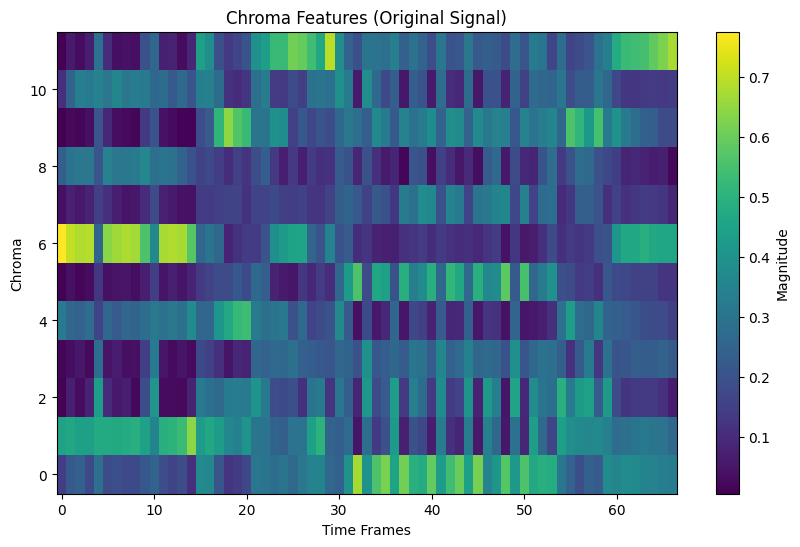

In [23]:
# your code here...

import numpy as np
import librosa
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.signal import get_window, medfilt
import soundfile as sf
from IPython.display import Audio, display

# Provided chroma computation functions
def simple_chroma(x, N, H, Fs):
    """
    Compute chroma features from an input signal.

    Parameters:
    - x: Input signal
    - N: Frame length
    - H: Hop size
    - Fs: Sampling rate

    Returns:
    - C: Chroma features
    """
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann', pad_mode='constant')
    Y = np.abs(X) ** 2
    Y_comp = np.log(1 + 0.5 * Y)
    C = np.zeros((12, Y.shape[1]), dtype=Y.dtype)
    n = np.arange(1, Y.shape[0])
    pitches = np.round(12 * np.log2((Fs * n / N) / 440)) + 69
    chroma_mapping = pitches % 12
    chroma_mapping = np.insert(chroma_mapping, 0, -1)  # Avoid DC offset
    for k in range(12):
        C[k, :] = Y_comp[chroma_mapping == k, :].sum(axis=0)
    C = normalize_chroma(C, 2, 0.0001)
    return C

def normalize_chroma(C, norm_p, threshold):
    """
    Normalize chroma features.

    Parameters:
    - C: Chroma features
    - norm_p: Norm type (e.g., 2 for L2 norm)
    - threshold: Minimum threshold for normalization

    Returns:
    - C_norm: Normalized chroma features
    """
    f_norm = norm(C, norm_p, axis=0)
    C_norm = C.copy()
    C_norm[:, f_norm >= threshold] /= f_norm[f_norm >= threshold]
    return C_norm

# Load audio file
file_path = 'CastanetsViolin.wav'
x, Fs = sf.read(file_path)

# Ensure mono signal
if x.ndim > 1:
    x = x[:, 0]

# Parameters for chroma computation
N = 4410  # Frame length
H = 2205  # Hop size

# Compute chroma features for original signal
print("Original Signal Chroma Features:")
C_original = simple_chroma(x, N, H, Fs)

# Visualize original chroma features
plt.figure(figsize=(10, 6))
plt.imshow(C_original, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('Time Frames')
plt.ylabel('Chroma')
plt.title('Chroma Features (Original Signal)')
plt.show()



## <a name="onset"></a> HPSS for Onset Detection

Onset detection is the task of finding the temporal positions of note onsets in a music recording.
More concrete, the task could be to detect all time positions on which some drum is hit
in a recording of a rock song.
One way to approach this problem is to assume, that drum hits emit a short burst of high energy
and the goal is therefore to detect these bursts in the input signal.
To this end, one first computes the *short-time power* ${\mathcal P}$ of the input signal $x$ by

\begin{equation}
    {\mathcal P}(m):= \sum_{n=0}^{N-1} x(n + m H)^2 \quad
\end{equation}

where $H$ is the hopsize and $N$ is the length of one frame (similar to the computation of the STFT).
Since we are looking for time-positions of high energy, the goal is therefore to detect peaks in ${\mathcal P}$.
A common technique to enhance peaks in a sequence is to
subtract the *local average* $\tilde{{\mathcal P}}$ from ${\mathcal P}$ itself. $\tilde{{\mathcal P}}$ is defined by

\begin{equation}
\tilde{{\mathcal P}}(m) := \sum_{j=-J}^{J}{\mathcal P}(m+j) \frac{1}{2J+1}
\end{equation}

for a neighborhood $J\in{\mathbb N}$, $m\in[0:M-1]$, and $M$ is the number of frames.
Note that we assume ${\mathcal P}(m) = 0$ for $m\notin [0:M-1]$.
From this, we compute a *novelty curve* ${\mathcal N}$

\begin{equation}
{\mathcal N}(m) := \max(0,{\mathcal P}(m) - \tilde{{\mathcal P}}(m))
\end{equation}

The peaks in ${\mathcal N}$ indicate positions of high energy in $x$, and are therefore potential time positions of drum hits.

This procedure works well in case the initial assumption, namely that onsets or drum hits emit some
burst of energy which stand out from the remaining energy in the signal, is met.
However, especially in professionally mixed music recordings, the short-time energy is often adjusted
to be more or less constant over time (compression).
One possibility to circumvent this problem is to apply HPSS to the input signal prior to the onset detection.
The onset detection is then executed solely on the percussive component which usually contains
all drum hits and satisfies the assumption of having energy bursts at the respective time-positions.

<div class="alert alert-block alert-warning">
<b>Lab Experiment 7</b><br>
Complete the implementation of the onset detection algorithm in the function <samp>onset_detection</samp>:

<ol>
<li> Compute the short-time power ${\mathcal P}$ of the input signal $x$ using the provided function <samp>stp</samp>.</li>
<li> Compute the local average $\tilde{{\mathcal P}}$.
              (Hint: Note that the equation can be formulated as a convolution and that you can compute convolutions in Python using the function <samp>np.convolve</samp>.
              Note further that this command has an keyword <samp>mode</samp>. Finally, have a look at the function <samp>np.ones</samp>.)</li>
<li> Compute the novelty curve ${\mathcal N}$.</li>
</ol>
</div>

In [24]:
import soundfile as sf
def stp(x, N, H):
    # x:  Input signal
    # N:  Frame length
    # H:  Hopsize
    x_pad = np.concatenate((x, np.zeros(N)))
    num_windows = np.ceil(1 + (len(x) - N) / H)
    win_pos = np.arange(num_windows) * H
    idx = np.array([np.arange(w, w+N) for w in win_pos], dtype='int32')
    P = (x_pad[idx] ** 2).sum(axis=1) / N
    return P

def onset_detection(x, N, H, J):

    # x:      Input signal
    # N:      Frame length
    # H:      Hopsize
    # J:      Neighborhood

    # short-time power
    # local average
    # novelty
    #return N_curve

    # Step 1: Compute short-time power
    P = stp(x, N, H)

    # Step 2: Compute local average using convolution
    local_avg = np.convolve(P, np.ones(2 * J + 1) / (2 * J + 1), mode='same')

    # Step 3: Compute novelty curve
    N_curve = np.maximum(0, P - local_avg)

    return N_curve

x, Fs = sf.read('CastanetsViolin.wav')

# Parameters for onset detection
N = 1024  # Frame length
H = 512   # Hop size
J = 10    # Neighborhood size for local averaging

# Perform onset detection
novelty_curve = onset_detection(x, N, H, J)

<div class="alert alert-block alert-warning">
Test your implementation by applying it to the audio file <samp>StillPluto_BitterPill.wav</samp>. As a starting point, use $N=882$, $H = 441$, and $J = 10$.
</div>

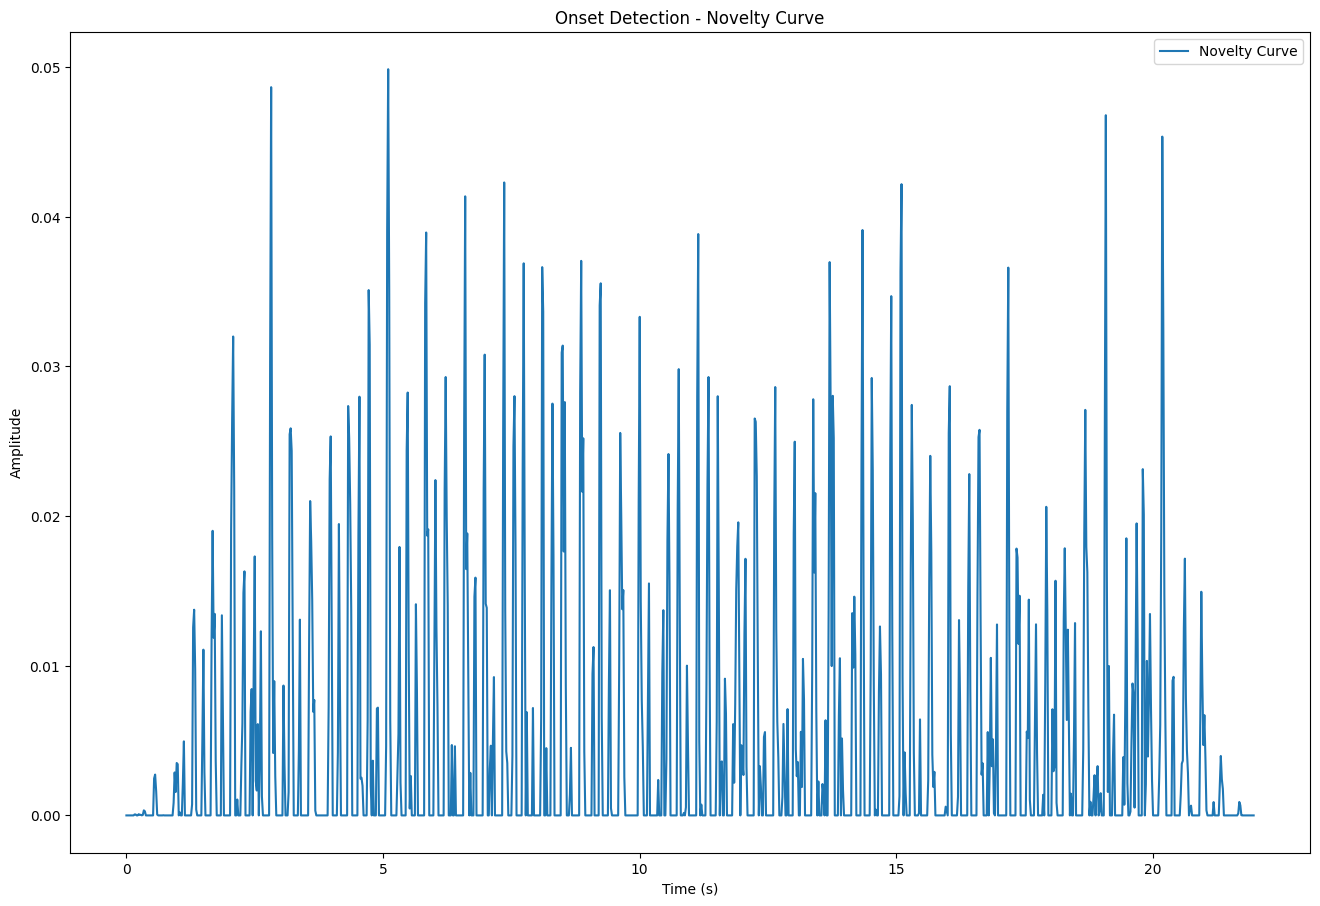

Original Signal:


In [25]:
# your code here...

# Load the audio file
x, Fs = sf.read('StillPluto_BitterPill.wav')

# Parameters for onset detection
N = 882   # Frame length
H = 441   # Hop size
J = 10    # Neighborhood size for local averaging

# Perform onset detection
novelty_curve = onset_detection(x, N, H, J)

# Generate time axis
num_frames = len(novelty_curve)
t = np.arange(num_frames) * H / Fs

# Plot the novelty curve
plt.figure(figsize=(16, 10.66))
plt.plot(t, novelty_curve, label="Novelty Curve")
plt.title("Onset Detection - Novelty Curve")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Playback the audio signal for context
print("Original Signal:")
display(Audio(x, rate=Fs))

<div class="alert alert-block alert-warning">
Sonify your results using the function <samp>sonify_noveltyCurve</samp>. This function will generate a stereo audio signal in which you can hear the provided original signal
      in one of the channels. In the other channel, each peak in the provided novelty curve is audible as a click sound. You can therefore check by listening whether the peaks in your
      computed novelty curve are aligned with drum hits in the original signal. To apply the function <samp>sonify_noveltyCurve</samp>, you need to specify the sampling frequency of the
      novelty curve. How can you compute it? (Hint: It is dependent on $H$ and the sampling frequency $F_\mathrm{s}$ of the input audio signal).
</div>

In [26]:
def sonify_noveltyCurve(novelty, x, Fs, sampling_frequency_novelty):
    pos = np.append(novelty, novelty[-1]) > np.insert(novelty, 0, novelty[0])
    neg = np.logical_not(pos)
    peaks = np.where(np.logical_and(pos[:-1], neg[1:]))[0]

    values = novelty[peaks]
    values /= np.max(values)
    peaks = peaks[values >= 0.01]
    values = values[values >= 0.01]
    peaks_idx = np.int32(np.round(peaks / sampling_frequency_novelty * Fs))

    sine_periods = 8
    sine_freq = 880
    click = np.sin(np.linspace(0, sine_periods * 2 * np.pi, sine_periods * Fs//sine_freq))
    ramp = np.linspace(1, 1/len(click), len(click)) ** 2
    click = click * ramp
    click = (click * np.abs(np.max(x)))

    out = np.zeros(len(x), dtype=x.dtype)
    for i, start in enumerate(peaks_idx):
        idx = np.arange(start, start+len(click))
        out[idx] += (click * values[i]).astype(x.dtype)

    return np.vstack((x, out))

# your code here...

# Load the audio file
x, Fs = sf.read('StillPluto_BitterPill.wav')

# Parameters for onset detection

# Perform onset detection
novelty_curve= onset_detection(x, N, H, J)

# Compute sampling frequency of the novelty curve
sampling_frequency_novelty = Fs / H

# Generate the sonified output
newx = sonify_noveltyCurve(novelty_curve, x, Fs, sampling_frequency_novelty)
print(newx)
# Playback the stereo signal
print("Sonified Novelty Curve:")
Audio(newx, rate=Fs)

Output hidden; open in https://colab.research.google.com to view.

<div class="alert alert-block alert-warning">
Listen to the generated results. What is your impression?
</div>

<div class="alert alert-block alert-warning">
Now apply your HPSS algorithm to the audio file and rerun the detection algorithm on just the percussive component $x_\mathrm{p}$. Again, sonify the results. What is your impression now?
</div>

In [29]:
# your code here...

w = get_window("hann", N)

# Apply HPSS
x_h, x_p = HPSS(x, N, H, w, Fs, lh_sec, lp_Hz)

# Perform onset detection on percussive component
novelty = onset_detection(x_p, N, H, 10)

# Time vector for plotting
num_frames = len(novelty)
t = np.arange(num_frames) * H / Fs

# Plot the novelty curve
plt.figure(figsize=(16, 10.66))
plt.plot(t, novelty, label="Novelty Curve on Percussive Component")
plt.title("Onset Detection on Percussive Component")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Sonify the novelty curve
newx = sonify_noveltyCurve(novelty, x_p, Fs, Fs / H)

# Playback the sonified novelty curve
print("Sonified Novelty Curve on Percussive Component:")
display(Audio(newx, rate=Fs))


Output hidden; open in https://colab.research.google.com to view.

<h4>Reference</h4>
<br/>

<div>
  <a href="http://www.springer.com/gp/book/9783319219448">
    <img src="./files/FMP_Cover.png" alt="FMP_Cover" width="80"  style="float:right;">
  </a>
</div>

<div style="float:left;">
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> <br />
Fundamentals of Music Processing &ndash; Audio, Analysis, Algorithms, Applications  <br />
ISBN: 978-3-319-21944-8<br />
483 p., <a href="http://www.springer.com/gp/book/9783319219448">Springer</a>, 2015  <br />
<a href="http://www.music-processing.de">www.music-processing.de</a>    <br />
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP">Accompanying Website</a>
</div>

<h4>Acknowledgment</h4>
<br/>
The International Audio Laboratories Erlangen are a joint institution of the Friedrich-Alexander-Universität Erlangen-Nürnberg (FAU) and Fraunhofer Institute for Integrated Circuits IIS.